In [23]:
import pandas as pd
import json
import io
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [24]:
file_path = '../Data/gws_cleaned_dataset.csv'
df = pd.read_csv(file_path)

In [25]:
df.size

484605

In [26]:
df

,Unnamed: 0,wine,wine_id,wine_slug,appellation,appellation_slug,color,regions,country,vintage,date,is_primeurs,score,confidence_index,journalist_count
0,0,"Chateau Margaux, Margaux",39051,chateau-margaux-margaux,Margaux,margaux,Red,['Bordeaux'],France,1900,2016-07-29,False,98.51,B,4
1,1,"Chateau Lafite Rothschild, Pauillac",37901,chateau-lafite-rothschild-pauillac,Pauillac,pauillac,Red,['Bordeaux'],France,1905,2018-05-01,False,84.46,C,3
2,2,"Chateau Latour, Pauillac",38177,chateau-latour-pauillac,Pauillac,pauillac,Red,['Bordeaux'],France,1909,2011-03-31,False,91.65,C,5
3,3,"Chateau Latour, Pauillac",38177,chateau-latour-pauillac,Pauillac,pauillac,Red,['Bordeaux'],France,1924,2018-02-01,False,91.39,C,3
4,4,"Chateau Lafite Rothschild, Pauillac",37901,chateau-lafite-rothschild-pauillac,Pauillac,pauillac,Red,['Bordeaux'],France,1924,2018-02-01,False,81.31,C,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32302,32302,"Chateau Laplagnotte-Bellevue, Saint Emilion Gr...",38089,chateau-laplagnotte-bellevue-saint-emilion-gra...,Saint Emilion Grand Cru,saint-emilion-grand-cru,Red,['Bordeaux'],France,2020,2021-05-01,True,88.05,B,3
32303,32303,"Denis Dubourdieu, Chateau Reynon, Cadillac Cot...",50204,denis-dubourdieu-chateau-reynon-cadillac-cotes...,Cadillac Cotes De Bordeaux,cadillac-cotes-de-bordeaux,Red,['Bordeaux'],France,2020,2021-05-01,True,87.87,A+,3
32304,32304,"Chateau Bois Pertuis, Bordeaux",32688,chateau-bois-pertuis-bordeaux,Bordeaux,bordeaux,Red,['Bordeaux'],France,2020,2021-05-01,True,85.90,C+,3
32305,32305,"Chateau Renon, Cadillac Cotes De Bordeaux",148280,chateau-renon-cadillac-cotes-de-bordeaux,Cadillac Cotes De Bordeaux,cadillac-cotes-de-bordeaux,Red,['Bordeaux'],France,2020,2021-05-01,True,82.59,C,3


In [27]:
df.nunique()

Unnamed: 0          32307
wine                 4184
wine_id              4184
wine_slug            4184
appellation           343
appellation_slug      342
color                   3
regions                35
country                14
vintage                58
date                 2431
is_primeurs             2
score                2010
confidence_index        6
journalist_count       21
dtype: int64

In [28]:
# vintage_loc = df.loc[(df['vintage']>1955) & (df['vintage'] <1980)]
vintage_loc = df.loc[(df['vintage']>1985) & (df['vintage'] <2021)]
# vintage_loc = df.loc[(df['vintage']>2000) & (df['vintage'] <2021)]

# score_loc = vintage_loc.loc[(vintage_loc['confidence_index'] == 'A+') | (vintage_loc['confidence_index'] == 'A') | (vintage_loc['confidence_index'] == 'B+') | (vintage_loc['confidence_index'] == 'B')]
# score_loc

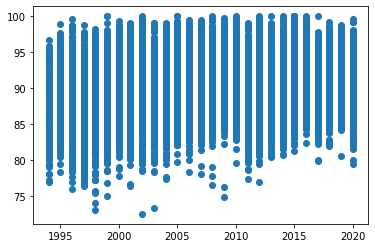

In [29]:
X = vintage_loc['vintage']
Y = vintage_loc['score']

# X = score_loc['vintage']
# Y = score_loc['score']

# Y = df['vintage']
# X = df['score']
plt.scatter(X, Y)

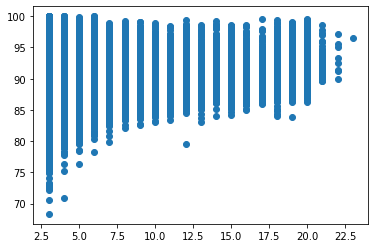

In [33]:
Y_grade = df.score
X_numGrade = df.journalist_count
plt.scatter(X_numGrade, Y_grade)

In [37]:
df['review_year'] = pd.DatetimeIndex(df['date']).year
df

,Unnamed: 0,wine,wine_id,wine_slug,appellation,appellation_slug,color,regions,country,vintage,date,is_primeurs,score,confidence_index,journalist_count,review_year
0,0,"Chateau Margaux, Margaux",39051,chateau-margaux-margaux,Margaux,margaux,Red,['Bordeaux'],France,1900,2016-07-29,False,98.51,B,4,2016
1,1,"Chateau Lafite Rothschild, Pauillac",37901,chateau-lafite-rothschild-pauillac,Pauillac,pauillac,Red,['Bordeaux'],France,1905,2018-05-01,False,84.46,C,3,2018
2,2,"Chateau Latour, Pauillac",38177,chateau-latour-pauillac,Pauillac,pauillac,Red,['Bordeaux'],France,1909,2011-03-31,False,91.65,C,5,2011
3,3,"Chateau Latour, Pauillac",38177,chateau-latour-pauillac,Pauillac,pauillac,Red,['Bordeaux'],France,1924,2018-02-01,False,91.39,C,3,2018
4,4,"Chateau Lafite Rothschild, Pauillac",37901,chateau-lafite-rothschild-pauillac,Pauillac,pauillac,Red,['Bordeaux'],France,1924,2018-02-01,False,81.31,C,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32302,32302,"Chateau Laplagnotte-Bellevue, Saint Emilion Gr...",38089,chateau-laplagnotte-bellevue-saint-emilion-gra...,Saint Emilion Grand Cru,saint-emilion-grand-cru,Red,['Bordeaux'],France,2020,2021-05-01,True,88.05,B,3,2021
32303,32303,"Denis Dubourdieu, Chateau Reynon, Cadillac Cot...",50204,denis-dubourdieu-chateau-reynon-cadillac-cotes...,Cadillac Cotes De Bordeaux,cadillac-cotes-de-bordeaux,Red,['Bordeaux'],France,2020,2021-05-01,True,87.87,A+,3,2021
32304,32304,"Chateau Bois Pertuis, Bordeaux",32688,chateau-bois-pertuis-bordeaux,Bordeaux,bordeaux,Red,['Bordeaux'],France,2020,2021-05-01,True,85.90,C+,3,2021
32305,32305,"Chateau Renon, Cadillac Cotes De Bordeaux",148280,chateau-renon-cadillac-cotes-de-bordeaux,Cadillac Cotes De Bordeaux,cadillac-cotes-de-bordeaux,Red,['Bordeaux'],France,2020,2021-05-01,True,82.59,C,3,2021


In [42]:
df['wine_age'] = np.subtract(df['review_year'], df['vintage']) 
# df.dtypes

In [43]:
df

,Unnamed: 0,wine,wine_id,wine_slug,appellation,appellation_slug,color,regions,country,vintage,date,is_primeurs,score,confidence_index,journalist_count,review_year,wine_age
0,0,"Chateau Margaux, Margaux",39051,chateau-margaux-margaux,Margaux,margaux,Red,['Bordeaux'],France,1900,2016-07-29,False,98.51,B,4,2016,116
1,1,"Chateau Lafite Rothschild, Pauillac",37901,chateau-lafite-rothschild-pauillac,Pauillac,pauillac,Red,['Bordeaux'],France,1905,2018-05-01,False,84.46,C,3,2018,113
2,2,"Chateau Latour, Pauillac",38177,chateau-latour-pauillac,Pauillac,pauillac,Red,['Bordeaux'],France,1909,2011-03-31,False,91.65,C,5,2011,102
3,3,"Chateau Latour, Pauillac",38177,chateau-latour-pauillac,Pauillac,pauillac,Red,['Bordeaux'],France,1924,2018-02-01,False,91.39,C,3,2018,94
4,4,"Chateau Lafite Rothschild, Pauillac",37901,chateau-lafite-rothschild-pauillac,Pauillac,pauillac,Red,['Bordeaux'],France,1924,2018-02-01,False,81.31,C,3,2018,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32302,32302,"Chateau Laplagnotte-Bellevue, Saint Emilion Gr...",38089,chateau-laplagnotte-bellevue-saint-emilion-gra...,Saint Emilion Grand Cru,saint-emilion-grand-cru,Red,['Bordeaux'],France,2020,2021-05-01,True,88.05,B,3,2021,1
32303,32303,"Denis Dubourdieu, Chateau Reynon, Cadillac Cot...",50204,denis-dubourdieu-chateau-reynon-cadillac-cotes...,Cadillac Cotes De Bordeaux,cadillac-cotes-de-bordeaux,Red,['Bordeaux'],France,2020,2021-05-01,True,87.87,A+,3,2021,1
32304,32304,"Chateau Bois Pertuis, Bordeaux",32688,chateau-bois-pertuis-bordeaux,Bordeaux,bordeaux,Red,['Bordeaux'],France,2020,2021-05-01,True,85.90,C+,3,2021,1
32305,32305,"Chateau Renon, Cadillac Cotes De Bordeaux",148280,chateau-renon-cadillac-cotes-de-bordeaux,Cadillac Cotes De Bordeaux,cadillac-cotes-de-bordeaux,Red,['Bordeaux'],France,2020,2021-05-01,True,82.59,C,3,2021,1


In [80]:
new_df = df[['score', 'journalist_count', 'vintage', 'wine_age', 'appellation', 'country', 'confidence_index']]
new_df

,score,journalist_count,vintage,wine_age,appellation,country,confidence_index
0,98.51,4,1900,116,Margaux,France,B
1,84.46,3,1905,113,Pauillac,France,C
2,91.65,5,1909,102,Pauillac,France,C
3,91.39,3,1924,94,Pauillac,France,C
4,81.31,3,1924,94,Pauillac,France,C
...,...,...,...,...,...,...,...
32302,88.05,3,2020,1,Saint Emilion Grand Cru,France,B
32303,87.87,3,2020,1,Cadillac Cotes De Bordeaux,France,A+
32304,85.90,3,2020,1,Bordeaux,France,C+
32305,82.59,3,2020,1,Cadillac Cotes De Bordeaux,France,C


In [81]:
data = new_df.values
appellation = data[:, 4]
country = data[:, 5]
confidence_index = data[:, 6]
country

array(['France', 'France', 'France', ..., 'France', 'France',
       'New Zealand'], dtype=object)

In [153]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(appellation)
encoded_appellation = label_encoder.transform(appellation)
encoded_appellation.reshape(-1,2)

ValueError: cannot reshape array of size 32307 into shape (2)

In [178]:
X = encoded_appellation[:32306].reshape(-1,2)
y = new_df.score

In [180]:
y2 = [ 1 for x in range(16153)]

In [181]:
len(y2)

16153

In [162]:
y.head()

0    98.51
1    84.46
2    91.65
3    91.39
4    81.31
Name: score, dtype: float64

In [182]:
from sklearn.tree import DecisionTreeClassifier
test = tree.DecisionTreeClassifier()
test.fit(X,y2)

DecisionTreeClassifier()

In [152]:
new_df.head()

,score,journalist_count,vintage,wine_age,appellation,country,confidence_index
0,98.51,4,1900,116,Margaux,France,B
1,84.46,3,1905,113,Pauillac,France,C
2,91.65,5,1909,102,Pauillac,France,C
3,91.39,3,1924,94,Pauillac,France,C
4,81.31,3,1924,94,Pauillac,France,C


In [151]:
label_encoder.transform(new_df)

ValueError: y should be a 1d array, got an array of shape (32307, 7) instead.

In [ ]:
decission

In [83]:
label_encoder.fit(country)
encoded_country = label_encoder.transform(country)

In [84]:
label_encoder.fit(confidence_index)
encoded_confidence_index = label_encoder.transform(confidence_index)

In [85]:
new_df.columns

Index(['score', 'journalist_count', 'vintage', 'wine_age', 'appellation',
       'country', 'confidence_index'],
      dtype='object')

In [117]:
newest = {
    'score': new_df['score'],
    'journalist_count': new_df['journalist_count'],
    'vintage': new_df['vintage'],
    'wine_age': new_df['wine_age'],
    'appellation': encoded_appellation.tolist(),
    'country': encoded_country.tolist(),
    'confidence_index':encoded_confidence_index.tolist()
}
newest

{'score': 0        98.51
 1        84.46
 2        91.65
 3        91.39
 4        81.31
          ...  
 32302    88.05
 32303    87.87
 32304    85.90
 32305    82.59
 32306    90.03
 Name: score, Length: 32307, dtype: float64,
 'journalist_count': 0        4
 1        3
 2        5
 3        3
 4        3
         ..
 32302    3
 32303    3
 32304    3
 32305    3
 32306    3
 Name: journalist_count, Length: 32307, dtype: int64,
 'vintage': 0        1900
 1        1905
 2        1909
 3        1924
 4        1924
          ... 
 32302    2020
 32303    2020
 32304    2020
 32305    2020
 32306    2020
 Name: vintage, Length: 32307, dtype: int64,
 'wine_age': 0        116
 1        113
 2        102
 3         94
 4         94
         ... 
 32302      1
 32303      1
 32304      1
 32305      1
 32306      1
 Name: wine_age, Length: 32307, dtype: int64,
 'appellation': [185,
  230,
  230,
  230,
  230,
  276,
  185,
  264,
  264,
  230,
  276,
  261,
  230,
  185,
  185,
  230,
  27

In [118]:
encoded_df = pd.DataFrame(data=newest)
encoded_df

,score,journalist_count,vintage,wine_age,appellation,country,confidence_index
0,98.51,4,1900,116,185,4,2
1,84.46,3,1905,113,230,4,4
2,91.65,5,1909,102,230,4,4
3,91.39,3,1924,94,230,4,4
4,81.31,3,1924,94,230,4,4
...,...,...,...,...,...,...,...
32302,88.05,3,2020,1,260,4,2
32303,87.87,3,2020,1,54,4,1
32304,85.90,3,2020,1,40,4,5
32305,82.59,3,2020,1,54,4,4


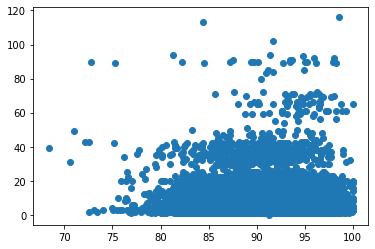

In [119]:
plt.scatter(encoded_df.score, encoded_df.wine_age)

In [110]:
encoded_df.dtypes

score               float64
journalist_count      int64
vintage               int64
wine_age              int64
dtype: object

In [111]:
target = encoded_df["score"]

In [112]:
data = encoded_df.drop("score", axis=1)
feature_names = data.columns
data.head()

,journalist_count,vintage,wine_age
0,4,1900,116
1,3,1905,113
2,5,1909,102
3,3,1924,94
4,3,1924,94


In [113]:
data.dtypes

journalist_count    int64
vintage             int64
wine_age            int64
dtype: object

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [122]:
test = tree.DecisionTreeClassifier()

In [123]:
test.fit(encoded_appellation, target)

ValueError: Expected 2D array, got 1D array instead:
array=[185. 230. 230. ...  40.  54. 186.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [115]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

ValueError: Unknown label type: 'continuous'

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.14726992933060135

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

ValueError: Unknown label type: 'continuous'

In [106]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [138]:
test = tree.DecisionTreeClassifier()
test.fit(encoded_df.confidence_index, encoded_df.score)

ValueError: Expected 2D array, got 1D array instead:
array=[2. 4. 4. ... 5. 4. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [137]:
encoded_df.confidence_index

0        2
1        4
2        4
3        4
4        4
        ..
32302    2
32303    1
32304    5
32305    4
32306    2
Name: confidence_index, Length: 32307, dtype: int64